2021-05-04 <br/>
Water Access Points<br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-05-04/readme.md

Modified RapidInsights EDA - Completed <br/>
Choropleth map - Completed <br/>

Referenced links: 

Plotting 2D Time Series: WHO Data 1999-2019 https://www.kaggle.com/deepdivelm/plotting-2d-time-series-who-data-1999-2019

In [1]:
#imports and basic outlines

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns

from copy import deepcopy
%matplotlib inline

from collections import Counter


In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_colwidth', 200)
from itertools import product
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

from IPython.display import HTML

In [3]:
pio.templates['plotly_dark'].layout.colorway = ('#0840D9','#882775','#00A34C','#B86200','#AA250E','#1D8682')

In [4]:
HTML("""
<style>
g.pointtext {display: none;}
</style>
""")

In [6]:
original_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-04/water.csv", error_bad_lines=False)

In [7]:
df=deepcopy(original_df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473293 entries, 0 to 473292
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   row_id         473293 non-null  int64  
 1   lat_deg        473293 non-null  float64
 2   lon_deg        473293 non-null  float64
 3   report_date    473293 non-null  object 
 4   status_id      473293 non-null  object 
 5   water_source   410579 non-null  object 
 6   water_tech     290703 non-null  object 
 7   facility_type  410485 non-null  object 
 8   country_name   473283 non-null  object 
 9   install_year   339003 non-null  float64
 10  installer      115742 non-null  object 
 11  pay            258323 non-null  object 
 12  status         363298 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 46.9+ MB


In [9]:
def check_duplicated(df):

    '''
    Helper function that highlights the duplicated values within the dataframe
    Arguments
    =========
    df: pandas dataframe

    Returns
    =======
    None 

    Shows the duplicated values present within the dataframe
    '''

    if len(df[df.duplicated()]) > 0:
        print("No. of duplicated entries: ", len(df[df.duplicated()]))
        print("### Duplicated values")
        print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
    else:
        print("No duplicated entries found")

In [10]:
check_duplicated(df)

No duplicated entries found


In [11]:
def missing_values_table(df):

    '''
    Helper function that provides information on the rows that contain missing values within the dataframe

    Arguments
    =========
    df: pandas dataframe
    
    Returns
    =======
    mis_val_table_ren_columns: A dataframe that contains the columns with missing values and how many are missing 
                               compared to the entire dataframe  

    '''

    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and a total of "+str(df.shape[0])+" values\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
                    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [12]:
print (missing_values_table(df))

Your selected dataframe has 13 columns and a total of 473293 values
There are 8 columns that have missing values.
               Missing Values  % of Total Values
installer              357551               75.5
pay                    214970               45.4
water_tech             182590               38.6
install_year           134290               28.4
status                 109995               23.2
facility_type           62808               13.3
water_source            62714               13.3
country_name               10                0.0


In [13]:
def visualize_missing_values(df):
    import missingno as msno
    '''
    Helper function that shows the relative position of the missing values

    Arguments
    =========
    df: pandas dataframe
   
    Returns
    =======
    None

    Comments
    ========
    Shows a heatmap of the missing values along with where these values are located with respect to the entire dataframe

    '''
    print("### Where are the missing values located")
    print(msno.matrix(df)) 
     
    # Visualize missing values as a heatmap 
    print("### Heatmap of the missing values")
    print(msno.heatmap(df))
    plt.show()

### Where are the missing values located
AxesSubplot(0.125,0.125;0.698618x0.755)
### Heatmap of the missing values
AxesSubplot(0.125,0.125;0.62x0.755)


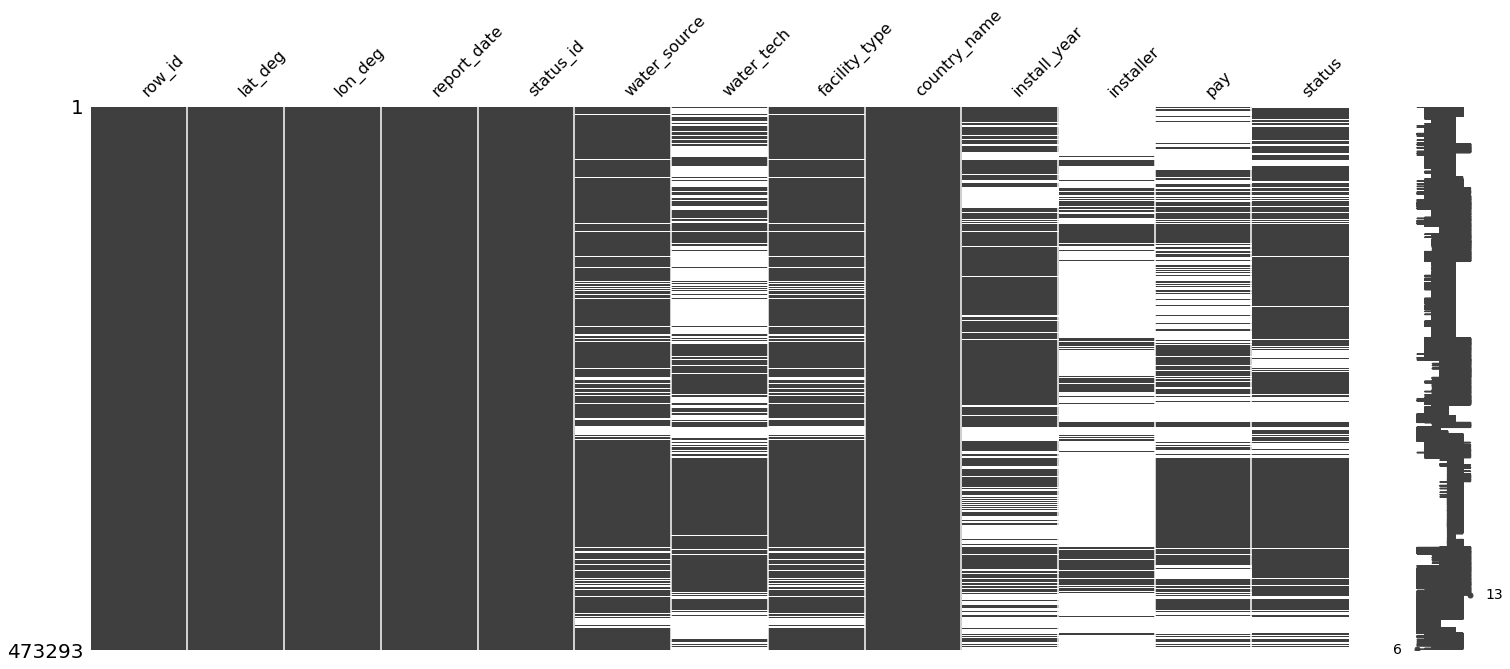

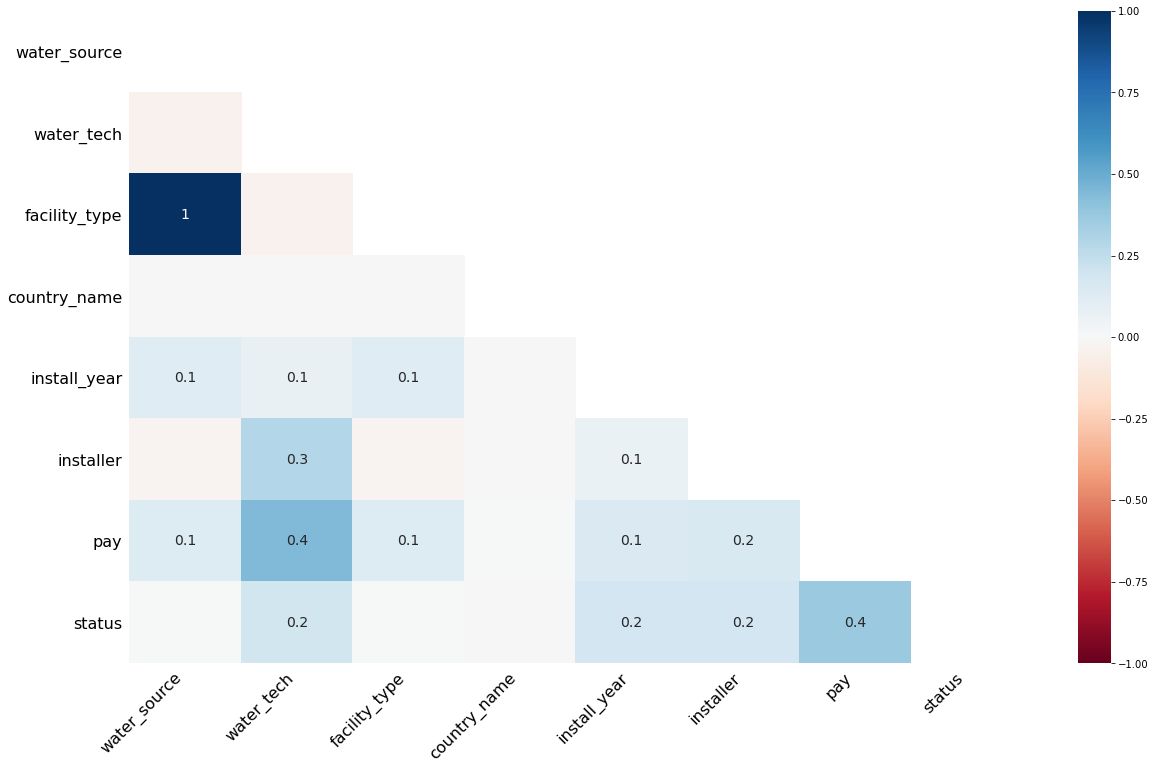

In [14]:
visualize_missing_values(df)

In [15]:
def check_data_type(df):

    '''
    Helper function that shows the data type of the dataframe
    Arguments
    =========
    df: pandas dataframe
    
    Returns
    =======
    None

    Comments
    ========
    Shows the data type, the number of unique values and the first value (to validate the data type) of each column in the dataframe
    '''

    interesting= pd.DataFrame(df.dtypes,columns=["Data_Type"])
    interesting["First_value"]=df.iloc[0,:]
    unique_values= df.nunique()
    interesting["Unique_values"]=unique_values
    print(interesting)

In [16]:
check_data_type(df)

              Data_Type  First_value  Unique_values
row_id            int64         3957         473293
lat_deg         float64      8.07314         457728
lon_deg         float64       38.617         459729
report_date      object   04/06/2017           5561
status_id        object            y              3
water_source     object          NaN             13
water_tech       object          NaN             19
facility_type    object          NaN              4
country_name     object     Ethiopia             34
install_year    float64          NaN            124
installer        object  Private-CRS           6311
pay              object          NaN            558
status           object          NaN          10327


In [21]:


def column_analysis(df):

    '''
    Helper function that gives a quick summary of each column of the data
    Arguments
    =========
    df: pandas dataframe
    
    Returns
    =======
    None

    Comments
    ========
    Prints the Unique values as a dataframe and as a bar graph. 
    If there are too many or too few unique values, it skips the graph
    '''

    print("### Unique Values")
    unique_values= df.nunique()
    print(unique_values)
    num_rows = len(df.index)
    low_information_cols = [] #
    print("### Individual column analysis")
    print("If there isn't a data frame for a column, it implies that the values in said column is either too custered or too sparse (i.e. It has low information)")
    for col in df.columns:

        cnts = df[col].value_counts(dropna=True)
        top_pct = (cnts/num_rows).iloc[0]
        
        if top_pct< .20:
            print("Column {0} has low information".format(col))
            low_information_cols.append(col)
            continue

        if top_pct < 0.75 and top_pct > 0.20:
            low_information_cols.append(col)
            print('Column: {0}       Most populated value: {1}  which covers {2:.5f}% of the column'.format(col,cnts.index[0], top_pct*100))
            print(cnts)
            print('\n')
    

        plt.figure()
        
        plt.title(f'{col} - {unique_values[col]} unique values',fontdict = {'fontsize' : 25})
        plt.ylabel('Count');
        values=pd.value_counts(df[col]).plot.bar()
        plt.xticks(rotation = 75,size=25);
        plt.yticks(size=25);
        plt.tight_layout()
        plt.show() 
    print("Columns with low information are:")
    print(np.setdiff1d(df.columns,low_information_cols))

### Unique Values
row_id           473293
lat_deg          457728
lon_deg          459729
report_date        5561
status_id             3
water_source         13
water_tech           19
facility_type         4
country_name         34
install_year        124
installer          6311
pay                 558
status            10327
dtype: int64
### Individual column analysis
If there isn't a data frame for a column, it implies that the values in said column is either too custered or too sparse (i.e. It has low information)
Column row_id has low information
Column lat_deg has low information
Column lon_deg has low information
Column report_date has low information
Column: status_id       Most populated value: y  which covers 71.08979% of the column
y    336463
n    105953
u     30877
Name: status_id, dtype: int64




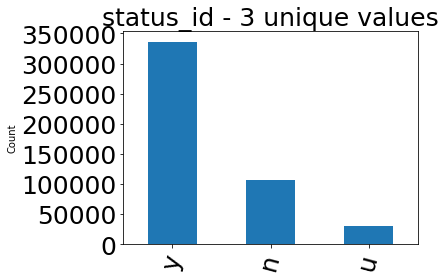

Column: water_source       Most populated value: Borehole  which covers 41.56558% of the column
Borehole                                      196727
Protected Shallow Well                         60240
Protected Spring                               43129
Undefined Shallow Well                         34225
Surface Water (River/Stream/Lake/Pond/Dam)     20843
Rainwater Harvesting                           18664
Unprotected Shallow Well                       18100
Undefined Spring                                7202
Piped Water                                     5221
Unprotected Spring                              4433
Sand or Sub-surface Dam                         1701
Delivered Water                                   92
Packaged water                                     2
Name: water_source, dtype: int64




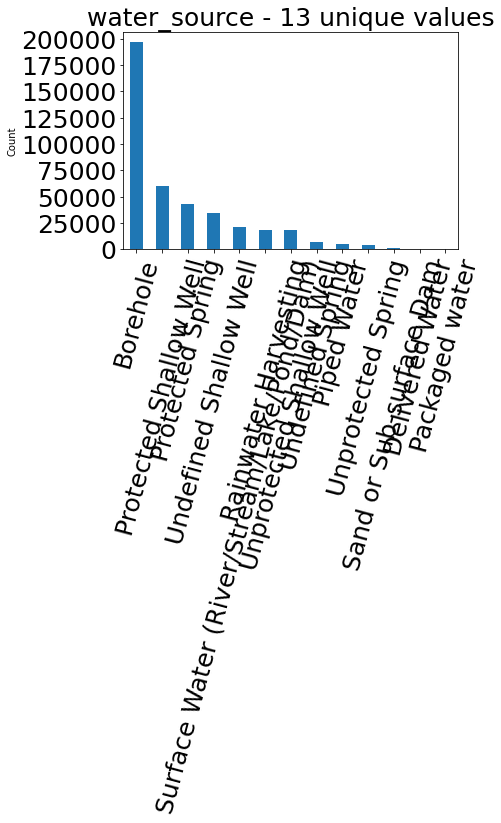

Column water_tech has low information
Column: facility_type       Most populated value: Improved  which covers 68.81192% of the column
Improved         325682
Unknown           41427
Unimproved        22533
No facilities     20843
Name: facility_type, dtype: int64




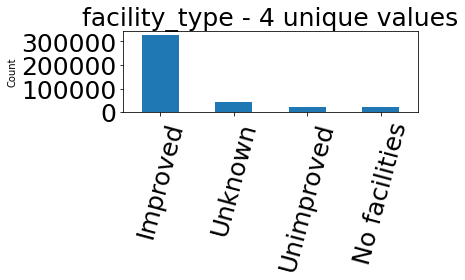

Column: country_name       Most populated value: Uganda  which covers 25.28476% of the column
Uganda                      119671
Nigeria                      83703
Sierra Leone                 67706
Liberia                      33781
Ethiopia                     25917
Tanzania                     24923
Swaziland                    23913
Zimbabwe                     23695
Ghana                        21334
Kenya                        12153
Zambia                        9093
Congo - Kinshasa              7958
South Sudan                   6885
Rwanda                        2953
Mozambique                    2478
Central African Republic      2447
Niger                         1101
Burkina Faso                   820
Madagascar                     800
Mali                           648
Peru                           579
Timor-Leste                    400
Gambia                         149
Chad                            35
Sudan                           34
Congo - Brazzaville            

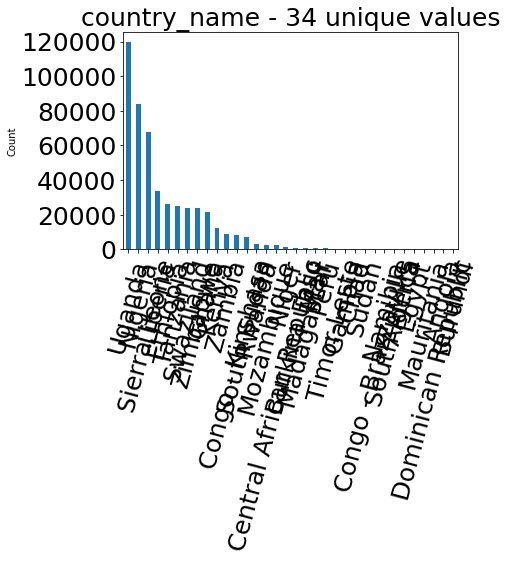

Column install_year has low information
Column installer has low information
Column pay has low information
Column status has low information
Columns with low information are:
[]


In [22]:
column_analysis(df)

In [23]:
df.head()

,row_id,lat_deg,lon_deg,report_date,status_id,water_source,water_tech,facility_type,country_name,install_year,installer,pay,status
0,3957,8.073136,38.617037,04/06/2017,y,NaN,NaN,NaN,Ethiopia,NaN,Private-CRS,NaN,NaN
1,33512,7.373784,40.503824,08/04/2020,y,Protected Spring,NaN,Improved,Ethiopia,2019.0,WaterAid,NaN,NaN
2,35125,0.773458,34.929509,03/18/2015,y,Protected Shallow Well,NaN,Improved,Kenya,NaN,NaN,NaN,NaN
3,37760,0.780576,34.963640,03/18/2015,y,Borehole,NaN,Improved,Kenya,NaN,NaN,NaN,NaN
4,38118,0.779266,34.971120,03/18/2015,y,Protected Shallow Well,NaN,Improved,Kenya,NaN,NaN,NaN,NaN


In [29]:
def plot_charts_map(df):
      
        

    fig = px.choropleth(df, locations="country_name",locationmode='country names',
    #animation_frame='report_date',
                    color="pay",title="ABC",
                    hover_name="country_name"

                    )
   # fig.show()

# Display Output in production
    img_bytes = fig.to_image(format="png")
    from IPython.display import Image
    Image(img_bytes)

def plot_charts_bar(df):
    fig=px.bar(x=df.groupby('country_name')['pay'].mean().sort_values()[::3].index,
                    y=df.groupby('country_name')['pay'].mean().sort_values()[::3].values,
                    title="ABC",
                labels={'x':'country_name','y':'pay'}
        )

    fig.update_layout(xaxis_tickangle=-90)

    #fig.show()

    # Display Output in production
    img_bytes = fig.to_image(format="png")
    from IPython.display import Image
    Image(img_bytes)


In [27]:
plot_charts_bar(df)

DataError: No numeric types to aggregate

In [30]:
plot_charts_map(df)

KeyError: (nan, '', '', '')

In [ ]:
def plot_worldmap(df, location, time, color, title):
    fig = px.choropleth(df, 
                        locations=location,
                        locationmode = "country names",
                        color=color, 
                        hover_name=location, 
                        animation_frame=time
                       )
    fig.update_layout(title_text = title,
                      title_x = 0.5,
                      geo=dict(
                      showframe = False,
                      showcoastlines = False)
                    )
    fig.show()

In [ ]:
def plot_world_vs_india(df, x, y, color_row, facet_row, title):
    fig = px.line(df, x=x, y=y, color= color_row, facet_row=facet_row)
    fig.update_layout(title_text = title, title_x = 0.5)
    fig.show()